In [1]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
from bokeh.palettes import Category20

Category20 = Category20[20]

In [2]:
data_dir = "C:\\Users\\dosre\\dev\\data-transfer\\benchmark-data"
# data_dir = "\\\\wsl.localhost\\Ubuntu\\home\\unix-dosre\\dev\\numerical-data\\benchmark\\output_data"

def load_benchmark_csv(label):
    data = np.loadtxt(os.path.join(data_dir, label+".csv"), delimiter=",", ndmin=2)
    return data


In [3]:
to_extrapolate = False
model_x_max = 1e7
model_pts = 1000

x_scale = 200
x_label = "non-zeros"

y_scale = 1e-6
y_label = "seconds"

inner_iters = 200
outer_iters = 300

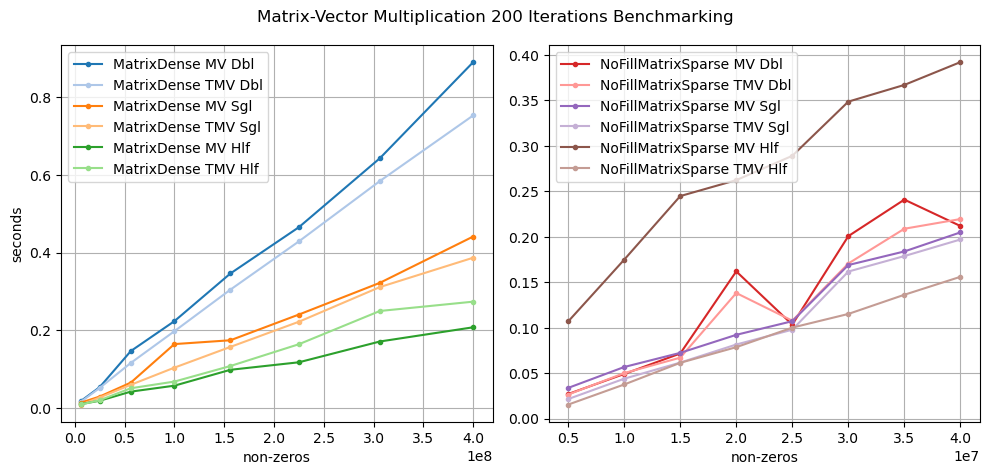

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4.8))
ax1, ax2 = axs

color_cnt = 0

for file_label, title in [
    ("matdense_mv_dbl", "MatrixDense MV Dbl"),
    ("matdense_tmv_dbl", "MatrixDense TMV Dbl"),
    ("matdense_mv_sgl", "MatrixDense MV Sgl"),
    ("matdense_tmv_sgl", "MatrixDense TMV Sgl"),
    ("matdense_mv_hlf", "MatrixDense MV Hlf"),
    ("matdense_tmv_hlf", "MatrixDense TMV Hlf")
]:

    data = load_benchmark_csv(file_label)
    data_x = data[:, 0]**2
    data_y = data[:, 1]*y_scale
    ax1.plot(data_x, data_y, ".-", label=title, color=Category20[color_cnt])

    if (to_extrapolate):
        params = np.polyfit(data_x, data_y, deg=2)
        model_x = np.linspace(data_x[-1], model_x_max, model_pts)
        model_y = params[2] + params[1]*model_x + params[0]*model_x*model_x
        ax1.plot(model_x, model_y, "--", color=Category20[color_cnt])

    color_cnt += 1

for file_label, title in [
    ("matsparse_mv_dbl", "NoFillMatrixSparse MV Dbl"),
    ("matsparse_tmv_dbl", "NoFillMatrixSparse TMV Dbl"),
    ("matsparse_mv_sgl", "NoFillMatrixSparse MV Sgl"),
    ("matsparse_tmv_sgl", "NoFillMatrixSparse TMV Sgl"),
    ("matsparse_mv_hlf", "NoFillMatrixSparse MV Hlf"),
    ("matsparse_tmv_hlf", "NoFillMatrixSparse TMV Hlf")
]:

    data = load_benchmark_csv(file_label)
    data_x = data[:, 0]*x_scale
    data_y = data[:, 1]*y_scale
    ax2.plot(data_x, data_y, ".-", label=title, color=Category20[color_cnt])

    if (to_extrapolate):
        params = np.polyfit(data_x, data_y, deg=1)
        model_x = np.linspace(data_x[-1], model_x_max, model_pts)
        model_y = params[1] + params[0]*model_x
        ax2.plot(model_x, model_y, "--", color=Category20[color_cnt])

    color_cnt += 1

for ax in axs:
    ax.grid()
    ax.legend()
    ax.set_xlabel(x_label)
ax1.set_ylabel(y_label)

fig.suptitle(f"Matrix-Vector Multiplication {inner_iters} Iterations Benchmarking")
fig.tight_layout()
plt.show()

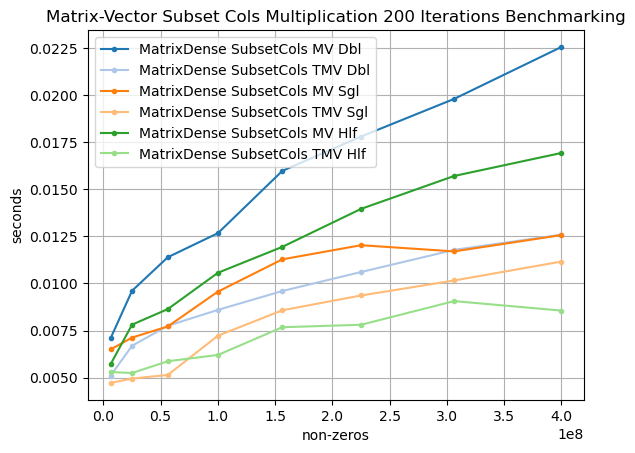

In [5]:
fig, ax = plt.subplots()

color_cnt = 0

for file_label, title in [
    ("matdense_subsetcolsmv_dbl", "MatrixDense SubsetCols MV Dbl"),
    ("matdense_subsetcolstmv_dbl", "MatrixDense SubsetCols TMV Dbl"),
    ("matdense_subsetcolsmv_sgl", "MatrixDense SubsetCols MV Sgl"),
    ("matdense_subsetcolstmv_sgl", "MatrixDense SubsetCols TMV Sgl"),
    ("matdense_subsetcolsmv_hlf", "MatrixDense SubsetCols MV Hlf"),
    ("matdense_subsetcolstmv_hlf", "MatrixDense SubsetCols TMV Hlf")
]:

    data = load_benchmark_csv(file_label)
    data_x = data[:, 0]**2
    data_y = data[:, 1]*y_scale
    ax.plot(data_x, data_y, ".-", label=title, color=Category20[color_cnt])

    if (to_extrapolate):
        params = np.polyfit(data_x, data_y, deg=2)
        model_x = np.linspace(data_x[-1], model_x_max, model_pts)
        model_y = params[2] + params[1]*model_x + params[0]*model_x*model_x
        ax.plot(model_x, model_y, "--", color=Category20[color_cnt])

    color_cnt += 1

ax.grid()
ax.legend()
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title(f"Matrix-Vector Subset Cols Multiplication {inner_iters} Iterations Benchmarking")

plt.show()

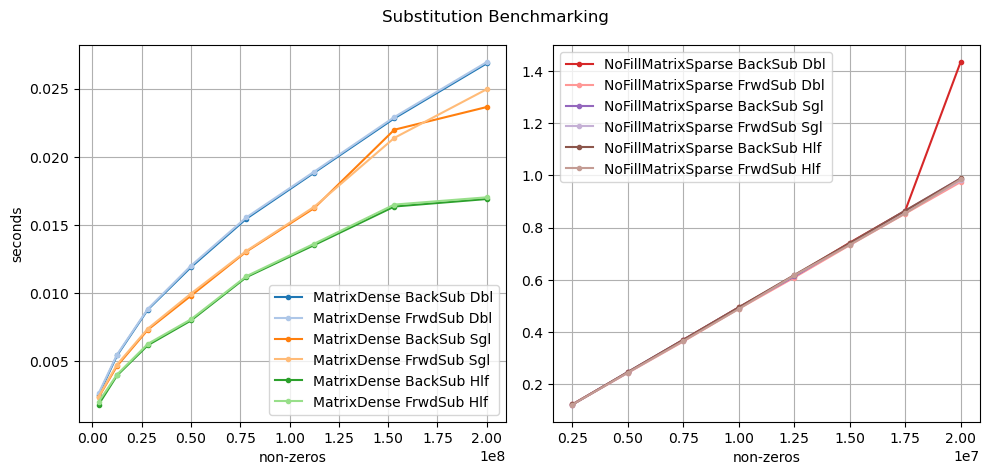

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4.8))
ax1, ax2 = axs

color_cnt = 0

for file_label, title in [
    ("matdense_backsub_dbl", "MatrixDense BackSub Dbl"),
    ("matdense_frwdsub_dbl", "MatrixDense FrwdSub Dbl"),
    ("matdense_backsub_sgl", "MatrixDense BackSub Sgl"),
    ("matdense_frwdsub_sgl", "MatrixDense FrwdSub Sgl"),
    ("matdense_backsub_hlf", "MatrixDense BackSub Hlf"),
    ("matdense_frwdsub_hlf", "MatrixDense FrwdSub Hlf")
]:

    data = load_benchmark_csv(file_label)
    data_x = 0.5*data[:, 0]**2
    data_y = data[:, 1]*y_scale
    ax1.plot(data_x, data_y, ".-", label=title, color=Category20[color_cnt])

    if (to_extrapolate):
        params = np.polyfit(data_x, data_y, deg=2)
        model_x = np.linspace(data_x[-1], model_x_max, model_pts)
        model_y = params[2] + params[1]*model_x + params[0]*model_x*model_x
        ax1.plot(model_x, model_y, "--", color=Category20[color_cnt])

    color_cnt += 1

for file_label, title in [
    ("matsparse_backsub_dbl", "NoFillMatrixSparse BackSub Dbl"),
    ("matsparse_frwdsub_dbl", "NoFillMatrixSparse FrwdSub Dbl"),
    ("matsparse_backsub_sgl", "NoFillMatrixSparse BackSub Sgl"),
    ("matsparse_frwdsub_sgl", "NoFillMatrixSparse FrwdSub Sgl"),
    ("matsparse_backsub_hlf", "NoFillMatrixSparse BackSub Hlf"),
    ("matsparse_frwdsub_hlf", "NoFillMatrixSparse FrwdSub Hlf")
]:

    data = load_benchmark_csv(file_label)
    data_x = 0.5*data[:, 0]*x_scale
    data_y = data[:, 1]*y_scale
    ax2.plot(data_x, data_y, ".-", label=title, color=Category20[color_cnt])

    if (to_extrapolate):
        params = np.polyfit(data_x, data_y, deg=1)
        model_x = np.linspace(data_x[-1], model_x_max, model_pts)
        model_y = params[1] + params[0]*model_x
        ax2.plot(model_x, model_y, "--", color=Category20[color_cnt])

    color_cnt += 1

for ax in axs:
    ax.grid()
    ax.legend()
    ax.set_xlabel(x_label)
ax1.set_ylabel(y_label)

fig.suptitle("Substitution Benchmarking")
fig.tight_layout()

plt.show()

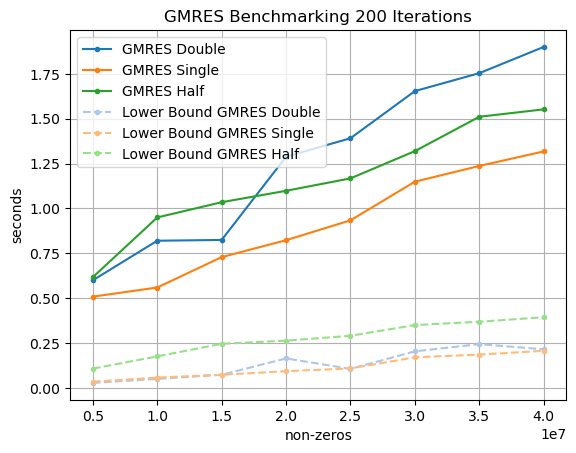

In [7]:
fig, ax = plt.subplots()

color_cnt = 0

for file_label, title in [("gmressolve_dbl", "GMRES Double"),
                          ("gmressolve_sgl", "GMRES Single"),
                          ("gmressolve_hlf", "GMRES Half")]:
    data = load_benchmark_csv(file_label)
    data_x = data[:, 0]*x_scale
    data_y = data[:, 1]*y_scale
    ax.plot(data_x, data_y, ".-", color=Category20[color_cnt], label=title)

    if (to_extrapolate):
        params = np.polyfit(data_x, data_y, deg=1)
        model_x = np.linspace(data_x[-1], model_x_max, model_pts)
        model_y = params[1] + params[0]*model_x
        ax.plot(model_x, model_y, "--", color=Category20[color_cnt])

    color_cnt += 2

color_cnt = 1

for file_label, matsparse_mv_data, title in [
    ("gmressolveextrapdata_dbl", "matsparse_mv_dbl", "Lower Bound GMRES Double"),
    ("gmressolveextrapdata_sgl", "matsparse_mv_sgl", "Lower Bound GMRES Single"),
    ("gmressolveextrapdata_hlf", "matsparse_mv_hlf", "Lower Bound GMRES Half")
]:

    data_extrap_extra = load_benchmark_csv(file_label)
    data_extrap_mv = load_benchmark_csv(matsparse_mv_data)
    data_extrap_x = data_extrap_mv[:, 0]*x_scale
    data_extrap_y = ((data_extrap_extra[:, 1])+data_extrap_mv[:, 1])*y_scale
    ax.plot(data_extrap_x, data_extrap_y, ".--", color=Category20[color_cnt], label=title)

    if (to_extrapolate):
        params = np.polyfit(data_extrap_x, data_extrap_y, deg=1)
        model_x = np.linspace(data_extrap_x[-1], model_x_max, model_pts)
        model_y = params[1] + params[0]*model_x
        ax.plot(model_x, model_y, "--", color=Category20[color_cnt])

    color_cnt += 2

ax.grid()
ax.legend()
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title(f"GMRES Benchmarking {inner_iters} Iterations")

plt.show()

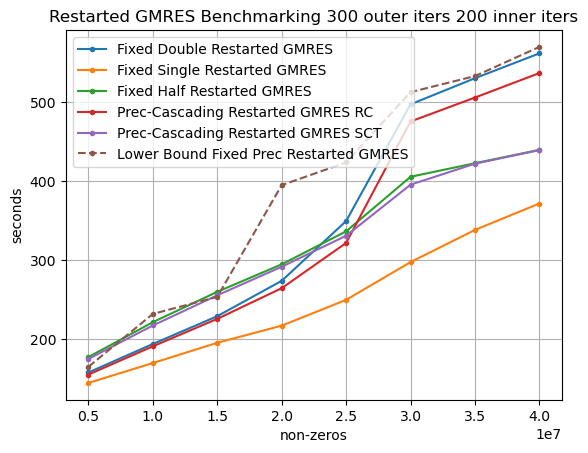

In [11]:
fig, ax = plt.subplots()

color_cnt = 0

for file_label, title in [("fp_gmres_ir_dbl", "Fixed Double Restarted GMRES"),
                          ("fp_gmres_ir_sgl", "Fixed Single Restarted GMRES"),
                          ("fp_gmres_ir_hlf", "Fixed Half Restarted GMRES"),
                          ("restart_count", "Prec-Cascading Restarted GMRES RC"),
                          ("simple_constant_threshold", "Prec-Cascading Restarted GMRES SCT")]:
    data = load_benchmark_csv(file_label)
    data_x = data[:, 0]*x_scale
    data_y = data[:, 1]*y_scale
    ax.plot(data_x, data_y, ".-", color=Category20[color_cnt], label=title)

    if (to_extrapolate):
        params = np.polyfit(data_x, data_y, deg=1)
        model_x = np.linspace(data_x[-1], model_x_max, model_pts)
        model_y = params[1] + params[0]*model_x
        ax.plot(model_x, model_y, "--", color=Category20[color_cnt])

    color_cnt += 2

data = load_benchmark_csv("gmressolve")
data_x = data[:, 0]*x_scale
data_y = data[:, 1]*outer_iters*y_scale
ax.plot(data_x, data_y, ".--", color=Category20[color_cnt], label="Lower Bound Fixed Prec Restarted GMRES")

if (to_extrapolate):
    params = np.polyfit(data_x, data_y, deg=1)
    model_x = np.linspace(data_x[-1], model_x_max, model_pts)
    model_y = params[1] + params[0]*model_x
    ax.plot(model_x, model_y, "--", color=Category20[color_cnt])

ax.grid()
ax.legend()
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title(f"Restarted GMRES Benchmarking {outer_iters} outer iters {inner_iters} inner iters")

plt.show()

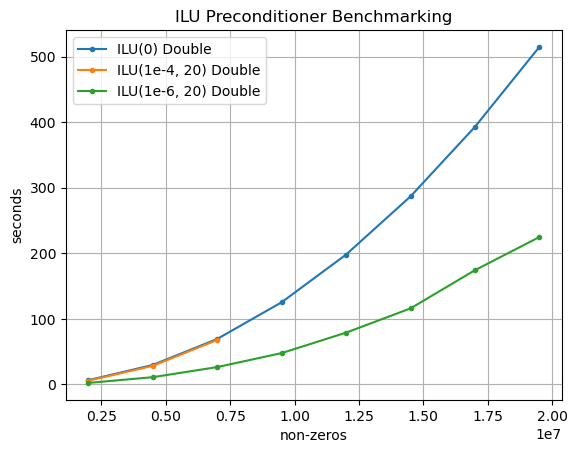

In [9]:
fig, ax = plt.subplots()

color_cnt = 0

for file_label, title in [("ilu0_precond_dbl", "ILU(0) Double"),
                          ("ilutp_em4_20_precond_dbl", "ILU(1e-4, 20) Double"),
                          ("ilutp_em6_20_precond_dbl", "ILU(1e-6, 20) Double")]:
    data = load_benchmark_csv(file_label)
    data_x = data[:, 0]*x_scale
    data_y = data[:, 1]*y_scale
    ax.plot(data_x, data_y, ".-", color=Category20[color_cnt], label=title)

    if (to_extrapolate):
        params = np.polyfit(data_x, data_y, deg=1)
        model_x = np.linspace(data_x[-1], model_x_max, model_pts)
        model_y = params[1] + params[0]*model_x
        ax.plot(model_x, model_y, "--", color=Category20[color_cnt])

    color_cnt += 2

ax.grid()
ax.legend()
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title(f"ILU Preconditioner Benchmarking")

plt.show()

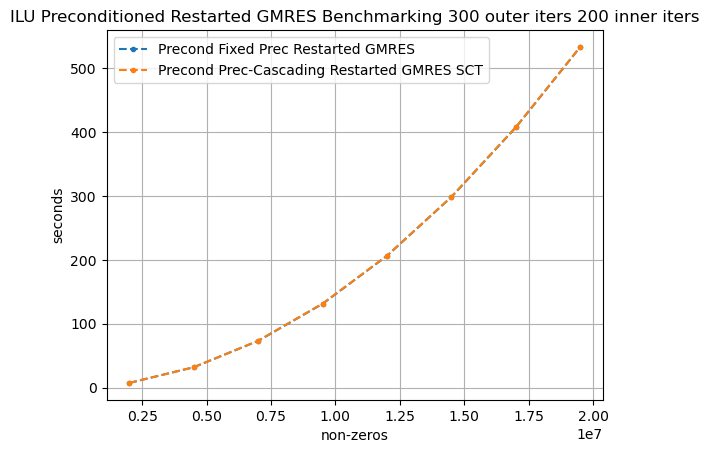

In [10]:
fig, ax = plt.subplots()

color_cnt = 0

for file_label, title in [("ilu0_fp_gmres_ir", "Precond Fixed Prec Restarted GMRES"),
                          ("ilu0_simple_constant_threshold", "Precond Prec-Cascading Restarted GMRES SCT")]:
    data = load_benchmark_csv(file_label)
    data_x = data[:, 0]*x_scale
    data_y = data[:, 1]*y_scale
    ax.plot(data_x, data_y, ".--", color=Category20[color_cnt], label=title)

    if (to_extrapolate):
        params = np.polyfit(data_x, data_y, deg=1)
        model_x = np.linspace(data_x[-1], model_x_max, model_pts)
        model_y = params[1] + params[0]*model_x
        ax.plot(model_x, model_y, "--", color=Category20[color_cnt])

    color_cnt += 2

ax.grid()
ax.legend()
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title(f"ILU Preconditioned Restarted GMRES Benchmarking {outer_iters} outer iters {inner_iters} inner iters")

plt.show()